In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Train.csv")
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [4]:
data =df.values

In [7]:
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(1600, 6)


In [13]:
X_train=data[:,:-1]
Y_train=data[:,-1]
Y_train=Y_train.reshape((-1,1))

In [14]:
print(X_train.shape)
print(Y_train.shape)

(1600, 5)
(1600, 1)


In [17]:
### Normalization
### We will use the same u and sigma on test set as well
u=np.mean(X_train,axis=0)
std=np.std(X_train,axis=0)

X_train=(X_train-u)/std

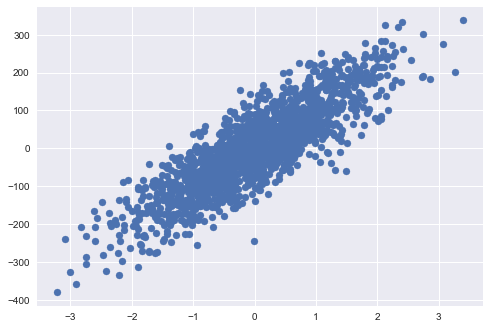

In [26]:
### Plotting a particular Feature with y
plt.style.use("seaborn")
plt.scatter(X_train[:,1],Y_train)
plt.show()

### Model

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model=LinearRegression()

In [29]:
model.fit(X_train,Y_train)

LinearRegression()

In [37]:
model.score(X_train,Y_train)

0.9660939669975617

### Processing The test data

In [31]:
dft=pd.read_csv("Test.csv")

In [32]:
X_test=dft.values

In [103]:
#### Normalization
X_test=(X_test-u)/std

In [104]:
pred=model.predict(X_test)

In [130]:
pred.shape
pred=pred.flatten()
print(pred.shape)

(400,)


In [135]:
idx=np.arange(400)

In [136]:
df=pd.DataFrame({'Id':idx,'target':pred})

In [138]:
df.tail()

,Id,target
395,395,-70.021138
396,396,-169.108505
397,397,129.618420
398,398,69.980801
399,399,64.417047


In [140]:
df.to_csv("submission.csv",index=False)